Designed as a walkthrough with this [YouTube video](https://colab.research.google.com/drive/1y0KnCFZvGVf_odSfcNAws6kcDD7HsI0L?usp=sharing)

# Tokenization :(

Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

- Why can't LLM spell words? **Tokenization**.
- Why can't LLM do super simple string processing tasks like reversing a string? **Tokenization**.
- Why is LLM worse at non-English languages (e.g. Japanese)? **Tokenization**.
- Why is LLM bad at simple arithmetic? **Tokenization**.
- Why did GPT-2 have more than necessary trouble coding in Python? **Tokenization**.
- Why did my LLM abruptly halt when it sees the string "<|endoftext|>"? **Tokenization**.
- What is this weird warning I get about a "trailing whitespace"? **Tokenization**.
- Why the LLM break if I ask it about "SolidGoldMagikarp"? **Tokenization**.
- Why should I prefer to use YAML over JSON with LLMs? **Tokenization**.
- Why is LLM not actually end-to-end language modeling? **Tokenization**.
- What is the real root of suffering? **Tokenization**.

> 为什么大模型不会拼写单词？ 因为 Tokenization。
> 为什么大模型处理不了反转字符串这种简单的字符串任务？ 因为 Tokenization。
> 为什么大模型在非英语语言（如日语）上表现较差？ 因为 Tokenization。
> 为什么大模型不擅长简单的算术？ 因为 Tokenization。
> 为什么 GPT-2 在编写 Python 代码时会遇到本不该有的困难？ 因为 Tokenization。
> 为什么我的大模型在看到字符串 <|endoftext|> 时会突然停止？ 因为 Tokenization。
> 那个关于“尾随空格（trailing whitespace）”的奇怪警告是怎么回事？ 因为 Tokenization。
> 为什么我问大模型关于 “SolidGoldMagikarp” 的事它就会崩溃？ 因为 Tokenization。
> 为什么在配合大模型使用时，YAML 比 JSON 更优？ 因为 Tokenization。
> 为什么大模型实际上并不是真正的“端到端”语言建模？ 因为 Tokenization。
> 什么是痛苦的真正根源？ Tokenization。

---

Good tokenization web app: [https://tiktokenizer.vercel.app](https://tiktokenizer.vercel.app)

Example string:

> GPT-4 的 tokenize 方案相较于 GPT-2 优化了空格的 token 表示，因此显著提高了 Python 代码生成的能力。

```
Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

127 + 677 = 804
1275 + 6773 = 8041

Egg.
I have an Egg.
egg.
EGG.

만나서 반가워요. 저는 OpenAI에서 개발한 대규모 언어 모델인 ChatGPT입니다. 궁금한 것이 있으시면 무엇이든 물어보세요.

for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
```

---

Much glory awaits someone who can delete the need for tokenization. But meanwhile, let's learn about it.

> 谁能终结对 Tokenization 的依赖，谁就将赢得至高无上的荣耀。但在此期间，我们还是先来了解一下它吧

In [ ]:
"안녕하세요 👋 (hello in Korean!)"

'안녕하세요 👋 (hello in Korean!)'

In [ ]:
[ord(x)for x in "안녕하세요 👋 (hello in Korean!)"]
# 为什么不直接使用 Unicode 作为 tokenize，是因为这样的设计会导致词表非常大。
# ord() 是针对单个字符的“unicode 编号查询”；而 encode() 是针对整串文本的“二进制转换”。

# 我们要搞清楚 unicode 和 utf-8 的区别：
# - Unicode 是一个标准，它给世界上每一个字符（无论是汉字、英文、Emoji 还是古埃及象形文字）都分配了一个唯一的编号。这个编号被称为码点 (Code Point)。
# - UTF-8 是将 Unicode 码点转换成二进制字节的一种具体实现方式。它的形式是变长字节（1 到 4 个字节）。本质是它决定了如何把 Unicode 的那个“编号”存进硬盘或通过网络传输。
# 因此，ord() 给出的是 Unicode（纯数字）。.encode() 给出的是 Bytes（二进制的十六进制缩写）。

# utf-8 在把 unicode 的纯数字转化为二进制时，是使用一套位运算公式，直接把 Unicode 码点（数字）“切割”并“塞入”特定的二进制模板中。

[50504,
 45397,
 54616,
 49464,
 50836,
 32,
 128075,
 32,
 40,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 75,
 111,
 114,
 101,
 97,
 110,
 33,
 41]

In [ ]:
list("안녕하세요 👋 (hello in Korean!)".encode("utf-8"))
# utf-8 会将 unicode 转化为多个二进制表示的字节，因此 utf-8 的显示范围是 0~255。
# 我们已经讨论了不能直接使用 unicode 作为 tokenize 的方案，那么能不能直接使用 utf-8 作为 tokenize 的方案呢？
# 答案是也不行，主要有两个问题：
# 1. 词表会非常小。
# 2. 文本序列化后的 token 会非常多，严重降低了 Transformer 的计算效率。

# 综上所述，我们没法直接拿 unicode 去做编码，也没法直接拿 utf-8 的计算结果做编码，那么就折中一下，将两者结合起来。

[236,
 149,
 136,
 235,
 133,
 149,
 237,
 149,
 152,
 236,
 132,
 184,
 236,
 154,
 148,
 32,
 240,
 159,
 145,
 139,
 32,
 40,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 75,
 111,
 114,
 101,
 97,
 110,
 33,
 41]

In [3]:
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."
tokens = text.encode("utf-8") 
# 使用 utf-8 对 unicode 进行编码，获得 raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience
# 将原始 token 转化为 int，对于简单英语，一般都是一个字母一个字节，而对于像 🅤🅝🅘🅒🅞🅓🅔 这种，则会出现一个字母多个字节的情况。
print('---')
print(text)
print("length:", len(text)) # 533
print('---')
print(tokens)
print("length:", len(tokens)) # 616

---
Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.
length: 533
---
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140

In [ ]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]): # Pythonic way to iterate consecutive elements
        # 组合出来的内容是 (1,2) (2,3) (3,4)
        # 在 Python 中，zip 函数的设计遵循“以最短的序列为准”。
        # ids 的长度是 $N$。ids[1:] 的长度是 $N-1$。当 zip 迭代到最后一步时，它发现 ids[1:] 已经空了，没有元素可以和 ids[-1] 配对。
        # 于是，zip 会优雅地停止，直接丢弃最后一个无法配对的元素。
        counts[pair] = counts.get(pair, 0) + 1
    return counts

stats = get_stats(tokens)
# print(stats)
print(sorted(((v,k) for k,v in stats.items()), reverse=True))
# 打印结果为 [(20, (101, 32)), (15, (240, 159)) ...
# 很明显，上述的内容的含义是 (101, 32) 这个元组出现的是最频繁的，出现次数是 20 次，这个过程也是 byte pair 算法的核心，持续迭代即可。

[(20, (101, 32)), (15, (240, 159)), (12, (226, 128)), (12, (105, 110)), (10, (115, 32)), (10, (97, 110)), (10, (32, 97)), (9, (32, 116)), (8, (116, 104)), (7, (159, 135)), (7, (159, 133)), (7, (97, 114)), (6, (239, 189)), (6, (140, 240)), (6, (128, 140)), (6, (116, 32)), (6, (114, 32)), (6, (111, 114)), (6, (110, 103)), (6, (110, 100)), (6, (109, 101)), (6, (104, 101)), (6, (101, 114)), (6, (32, 105)), (5, (117, 115)), (5, (115, 116)), (5, (110, 32)), (5, (100, 101)), (5, (44, 32)), (5, (32, 115)), (4, (116, 105)), (4, (116, 101)), (4, (115, 44)), (4, (114, 105)), (4, (111, 117)), (4, (111, 100)), (4, (110, 116)), (4, (110, 105)), (4, (105, 99)), (4, (104, 97)), (4, (103, 32)), (4, (101, 97)), (4, (100, 32)), (4, (99, 111)), (4, (97, 109)), (4, (85, 110)), (4, (32, 119)), (4, (32, 111)), (4, (32, 102)), (4, (32, 85)), (3, (118, 101)), (3, (116, 115)), (3, (116, 114)), (3, (116, 111)), (3, (114, 116)), (3, (114, 115)), (3, (114, 101)), (3, (111, 102)), (3, (111, 32)), (3, (108, 108)), (

In [ ]:
top_pair = max(stats, key=stats.get)
# 这里的 key 的作用：
# “嘿，max 函数，请你在比较 stats 里的每一个 Key 时，先把它丢进 stats.get() 里算一下，用算出来的结果（也就是 Value/次数）作为比较的依据，但最后把原始的 Key 返回给我。”
top_pair

(101, 32)

In [ ]:
def merge(ids, pair, idx):
  # in the list of ints (ids), replace all consecutive occurences of pair with the new token idx
  newids = []
  i = 0
  while i < len(ids):
    # if we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

print(merge([5, 6, 6, 7, 9, 1], (6, 7), 99))
# 整个 merge 函数会将 (6,7) 替换为 99，从而变为：
# 5 6 99 9 1
# 因此 byte pair 算法其实就是在重复上述两个流程，不断的找到最高频的，然后去合并。
tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print("length:", len(tokens2))

[5, 6, 99, 9, 1]
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 240, 159, 135, 169, 226, 128, 140, 240, 159, 135, 170, 33, 32, 240, 159, 152, 132, 32, 84, 104, 256, 118, 101, 114, 121, 32, 110, 97, 109, 256, 115, 116, 114, 105, 107, 101, 115, 32, 102, 101, 97, 114, 32, 97, 110, 100, 32, 97, 119, 256, 105, 110, 116, 111, 32, 116, 104, 256, 104, 101, 97, 114, 116, 115, 32, 111, 102, 32, 112, 114, 111, 103, 114, 97, 109, 109, 101, 114, 115, 32, 119, 111, 114, 108, 100, 119, 105, 100, 101, 46, 32, 87, 256, 97, 108, 108, 32, 107, 110, 111, 119, 32, 119, 256, 111, 117, 103, 104, 116, 32, 116, 111, 

In [ ]:
# making the training text longer to have more representative token statistics
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = """A Programmer’s Introduction to Unicode March 3, 2017 · Coding · 22 Comments  Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺\u200c🇳\u200c🇮\u200c🇨\u200c🇴\u200c🇩\u200c🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.  A few months ago, I got interested in Unicode and decided to spend some time learning more about it in detail. In this article, I’ll give an introduction to it from a programmer’s point of view.  I’m going to focus on the character set and what’s involved in working with strings and files of Unicode text. However, in this article I’m not going to talk about fonts, text layout/shaping/rendering, or localization in detail—those are separate issues, beyond my scope (and knowledge) here.  Diversity and Inherent Complexity The Unicode Codespace Codespace Allocation Scripts Usage Frequency Encodings UTF-8 UTF-16 Combining Marks Canonical Equivalence Normalization Forms Grapheme Clusters And More… Diversity and Inherent Complexity As soon as you start to study Unicode, it becomes clear that it represents a large jump in complexity over character sets like ASCII that you may be more familiar with. It’s not just that Unicode contains a much larger number of characters, although that’s part of it. Unicode also has a great deal of internal structure, features, and special cases, making it much more than what one might expect a mere “character set” to be. We’ll see some of that later in this article.  When confronting all this complexity, especially as an engineer, it’s hard not to find oneself asking, “Why do we need all this? Is this really necessary? Couldn’t it be simplified?”  However, Unicode aims to faithfully represent the entire world’s writing systems. The Unicode Consortium’s stated goal is “enabling people around the world to use computers in any language”. And as you might imagine, the diversity of written languages is immense! To date, Unicode supports 135 different scripts, covering some 1100 languages, and there’s still a long tail of over 100 unsupported scripts, both modern and historical, which people are still working to add.  Given this enormous diversity, it’s inevitable that representing it is a complicated project. Unicode embraces that diversity, and accepts the complexity inherent in its mission to include all human writing systems. It doesn’t make a lot of trade-offs in the name of simplification, and it makes exceptions to its own rules where necessary to further its mission.  Moreover, Unicode is committed not just to supporting texts in any single language, but also to letting multiple languages coexist within one text—which introduces even more complexity.  Most programming languages have libraries available to handle the gory low-level details of text manipulation, but as a programmer, you’ll still need to know about certain Unicode features in order to know when and how to apply them. It may take some time to wrap your head around it all, but don’t be discouraged—think about the billions of people for whom your software will be more accessible through supporting text in their language. Embrace the complexity!  The Unicode Codespace Let’s start with some general orientation. The basic elements of Unicode—its “characters”, although that term isn’t quite right—are called code points. Code points are identified by number, customarily written in hexadecimal with the prefix “U+”, such as U+0041 “A” latin capital letter a or U+03B8 “θ” greek small letter theta. Each code point also has a short name, and quite a few other properties, specified in the Unicode Character Database.  The set of all possible code points is called the codespace. The Unicode codespace consists of 1,114,112 code points. However, only 128,237 of them—about 12% of the codespace—are actually assigned, to date. There’s plenty of room for growth! Unicode also reserves an additional 137,468 code points as “private use” areas, which have no standardized meaning and are available for individual applications to define for their own purposes.  Codespace Allocation To get a feel for how the codespace is laid out, it’s helpful to visualize it. Below is a map of the entire codespace, with one pixel per code point. It’s arranged in tiles for visual coherence; each small square is 16×16 = 256 code points, and each large square is a “plane” of 65,536 code points. There are 17 planes altogether.  Map of the Unicode codespace (click to zoom)  White represents unassigned space. Blue is assigned code points, green is private-use areas, and the small red area is surrogates (more about those later). As you can see, the assigned code points are distributed somewhat sparsely, but concentrated in the first three planes.  Plane 0 is also known as the “Basic Multilingual Plane”, or BMP. The BMP contains essentially all the characters needed for modern text in any script, including Latin, Cyrillic, Greek, Han (Chinese), Japanese, Korean, Arabic, Hebrew, Devanagari (Indian), and many more.  (In the past, the codespace was just the BMP and no more—Unicode was originally conceived as a straightforward 16-bit encoding, with only 65,536 code points. It was expanded to its current size in 1996. However, the vast majority of code points in modern text belong to the BMP.)  Plane 1 contains historical scripts, such as Sumerian cuneiform and Egyptian hieroglyphs, as well as emoji and various other symbols. Plane 2 contains a large block of less-common and historical Han characters. The remaining planes are empty, except for a small number of rarely-used formatting characters in Plane 14; planes 15–16 are reserved entirely for private use.  Scripts Let’s zoom in on the first three planes, since that’s where the action is:  Map of scripts in Unicode planes 0–2 (click to zoom)  This map color-codes the 135 different scripts in Unicode. You can see how Han () and Korean () take up most of the range of the BMP (the left large square). By contrast, all of the European, Middle Eastern, and South Asian scripts fit into the first row of the BMP in this diagram.  Many areas of the codespace are adapted or copied from earlier encodings. For example, the first 128 code points of Unicode are just a copy of ASCII. This has clear benefits for compatibility—it’s easy to losslessly convert texts from smaller encodings into Unicode (and the other direction too, as long as no characters outside the smaller encoding are used).  Usage Frequency One more interesting way to visualize the codespace is to look at the distribution of usage—in other words, how often each code point is actually used in real-world texts. Below is a heat map of planes 0–2 based on a large sample of text from Wikipedia and Twitter (all languages). Frequency increases from black (never seen) through red and yellow to white.  Heat map of code point usage frequency in Unicode planes 0–2 (click to zoom)  You can see that the vast majority of this text sample lies in the BMP, with only scattered usage of code points from planes 1–2. The biggest exception is emoji, which show up here as the several bright squares in the bottom row of plane 1.  Encodings We’ve seen that Unicode code points are abstractly identified by their index in the codespace, ranging from U+0000 to U+10FFFF. But how do code points get represented as bytes, in memory or in a file?  The most convenient, computer-friendliest (and programmer-friendliest) thing to do would be to just store the code point index as a 32-bit integer. This works, but it consumes 4 bytes per code point, which is sort of a lot. Using 32-bit ints for Unicode will cost you a bunch of extra storage, memory, and performance in bandwidth-bound scenarios, if you work with a lot of text.  Consequently, there are several more-compact encodings for Unicode. The 32-bit integer encoding is officially called UTF-32 (UTF = “Unicode Transformation Format”), but it’s rarely used for storage. At most, it comes up sometimes as a temporary internal representation, for examining or operating on the code points in a string.  Much more commonly, you’ll see Unicode text encoded as either UTF-8 or UTF-16. These are both variable-length encodings, made up of 8-bit or 16-bit units, respectively. In these schemes, code points with smaller index values take up fewer bytes, which saves a lot of memory for typical texts. The trade-off is that processing UTF-8/16 texts is more programmatically involved, and likely slower.  UTF-8 In UTF-8, each code point is stored using 1 to 4 bytes, based on its index value.  UTF-8 uses a system of binary prefixes, in which the high bits of each byte mark whether it’s a single byte, the beginning of a multi-byte sequence, or a continuation byte; the remaining bits, concatenated, give the code point index. This table shows how it works:  UTF-8 (binary)\tCode point (binary)\tRange 0xxxxxxx\txxxxxxx\tU+0000–U+007F 110xxxxx 10yyyyyy\txxxxxyyyyyy\tU+0080–U+07FF 1110xxxx 10yyyyyy 10zzzzzz\txxxxyyyyyyzzzzzz\tU+0800–U+FFFF 11110xxx 10yyyyyy 10zzzzzz 10wwwwww\txxxyyyyyyzzzzzzwwwwww\tU+10000–U+10FFFF A handy property of UTF-8 is that code points below 128 (ASCII characters) are encoded as single bytes, and all non-ASCII code points are encoded using sequences of bytes 128–255. This has a couple of nice consequences. First, any strings or files out there that are already in ASCII can also be interpreted as UTF-8 without any conversion. Second, lots of widely-used string programming idioms—such as null termination, or delimiters (newlines, tabs, commas, slashes, etc.)—will just work on UTF-8 strings. ASCII bytes never occur inside the encoding of non-ASCII code points, so searching byte-wise for a null terminator or a delimiter will do the right thing.  Thanks to this convenience, it’s relatively simple to extend legacy ASCII programs and APIs to handle UTF-8 strings. UTF-8 is very widely used in the Unix/Linux and Web worlds, and many programmers argue UTF-8 should be the default encoding everywhere.  However, UTF-8 isn’t a drop-in replacement for ASCII strings in all respects. For instance, code that iterates over the “characters” in a string will need to decode UTF-8 and iterate over code points (or maybe grapheme clusters—more about those later), not bytes. When you measure the “length” of a string, you’ll need to think about whether you want the length in bytes, the length in code points, the width of the text when rendered, or something else.  UTF-16 The other encoding that you’re likely to encounter is UTF-16. It uses 16-bit words, with each code point stored as either 1 or 2 words.  Like UTF-8, we can express the UTF-16 encoding rules in the form of binary prefixes:  UTF-16 (binary)\tCode point (binary)\tRange xxxxxxxxxxxxxxxx\txxxxxxxxxxxxxxxx\tU+0000–U+FFFF 110110xxxxxxxxxx 110111yyyyyyyyyy\txxxxxxxxxxyyyyyyyyyy + 0x10000\tU+10000–U+10FFFF A more common way that people talk about UTF-16 encoding, though, is in terms of code points called “surrogates”. All the code points in the range U+D800–U+DFFF—or in other words, the code points that match the binary prefixes 110110 and 110111 in the table above—are reserved specifically for UTF-16 encoding, and don’t represent any valid characters on their own. They’re only meant to occur in the 2-word encoding pattern above, which is called a “surrogate pair”. Surrogate code points are illegal in any other context! They’re not allowed in UTF-8 or UTF-32 at all.  Historically, UTF-16 is a descendant of the original, pre-1996 versions of Unicode, in which there were only 65,536 code points. The original intention was that there would be no different “encodings”; Unicode was supposed to be a straightforward 16-bit character set. Later, the codespace was expanded to make room for a long tail of less-common (but still important) Han characters, which the Unicode designers didn’t originally plan for. Surrogates were then introduced, as—to put it bluntly—a kludge, allowing 16-bit encodings to access the new code points.  Today, Javascript uses UTF-16 as its standard string representation: if you ask for the length of a string, or iterate over it, etc., the result will be in UTF-16 words, with any code points outside the BMP expressed as surrogate pairs. UTF-16 is also used by the Microsoft Win32 APIs; though Win32 supports either 8-bit or 16-bit strings, the 8-bit version unaccountably still doesn’t support UTF-8—only legacy code-page encodings, like ANSI. This leaves UTF-16 as the only way to get proper Unicode support in Windows. (Update: in Win10 version 1903, they finally added UTF-8 support to the 8-bit APIs! 😊)  By the way, UTF-16’s words can be stored either little-endian or big-endian. Unicode has no opinion on that issue, though it does encourage the convention of putting U+FEFF zero width no-break space at the top of a UTF-16 file as a byte-order mark, to disambiguate the endianness. (If the file doesn’t match the system’s endianness, the BOM will be decoded as U+FFFE, which isn’t a valid code point.)  Combining Marks In the story so far, we’ve been focusing on code points. But in Unicode, a “character” can be more complicated than just an individual code point!  Unicode includes a system for dynamically composing characters, by combining multiple code points together. This is used in various ways to gain flexibility without causing a huge combinatorial explosion in the number of code points.  In European languages, for example, this shows up in the application of diacritics to letters. Unicode supports a wide range of diacritics, including acute and grave accents, umlauts, cedillas, and many more. All these diacritics can be applied to any letter of any alphabet—and in fact, multiple diacritics can be used on a single letter.  If Unicode tried to assign a distinct code point to every possible combination of letter and diacritics, things would rapidly get out of hand. Instead, the dynamic composition system enables you to construct the character you want, by starting with a base code point (the letter) and appending additional code points, called “combining marks”, to specify the diacritics. When a text renderer sees a sequence like this in a string, it automatically stacks the diacritics over or under the base letter to create a composed character.  For example, the accented character “Á” can be expressed as a string of two code points: U+0041 “A” latin capital letter a plus U+0301 “◌́” combining acute accent. This string automatically gets rendered as a single character: “Á”.  Now, Unicode does also include many “precomposed” code points, each representing a letter with some combination of diacritics already applied, such as U+00C1 “Á” latin capital letter a with acute or U+1EC7 “ệ” latin small letter e with circumflex and dot below. I suspect these are mostly inherited from older encodings that were assimilated into Unicode, and kept around for compatibility. In practice, there are precomposed code points for most of the common letter-with-diacritic combinations in European-script languages, so they don’t use dynamic composition that much in typical text.  Still, the system of combining marks does allow for an arbitrary number of diacritics to be stacked on any base character. The reductio-ad-absurdum of this is Zalgo text, which works by ͖͟ͅr͞aṋ̫̠̖͈̗d͖̻̹óm̪͙͕̗̝ļ͇̰͓̳̫ý͓̥̟͍ ̕s̫t̫̱͕̗̰̼̘͜a̼̩͖͇̠͈̣͝c̙͍k̖̱̹͍͘i̢n̨̺̝͇͇̟͙ģ̫̮͎̻̟ͅ ̕n̼̺͈͞u̮͙m̺̭̟̗͞e̞͓̰̤͓̫r̵o̖ṷs҉̪͍̭̬̝̤ ̮͉̝̞̗̟͠d̴̟̜̱͕͚i͇̫̼̯̭̜͡ḁ͙̻̼c̲̲̹r̨̠̹̣̰̦i̱t̤̻̤͍͙̘̕i̵̜̭̤̱͎c̵s ͘o̱̲͈̙͖͇̲͢n͘ ̜͈e̬̲̠̩ac͕̺̠͉h̷̪ ̺̣͖̱ḻ̫̬̝̹ḙ̙̺͙̭͓̲t̞̞͇̲͉͍t̷͔̪͉̲̻̠͙e̦̻͈͉͇r͇̭̭̬͖,̖́ ̜͙͓̣̭s̘̘͈o̱̰̤̲ͅ ̛̬̜̙t̼̦͕̱̹͕̥h̳̲͈͝ͅa̦t̻̲ ̻̟̭̦̖t̛̰̩h̠͕̳̝̫͕e͈̤̘͖̞͘y҉̝͙ ̷͉͔̰̠o̞̰v͈͈̳̘͜er̶f̰͈͔ḻ͕̘̫̺̲o̲̭͙͠ͅw̱̳̺ ͜t̸h͇̭͕̳͍e̖̯̟̠ ͍̞̜͔̩̪͜ļ͎̪̲͚i̝̲̹̙̩̹n̨̦̩̖ḙ̼̲̼͢ͅ ̬͝s̼͚̘̞͝p͙̘̻a̙c҉͉̜̤͈̯̖i̥͡n̦̠̱͟g̸̗̻̦̭̮̟ͅ ̳̪̠͖̳̯̕a̫͜n͝d͡ ̣̦̙ͅc̪̗r̴͙̮̦̹̳e͇͚̞͔̹̫͟a̙̺̙ț͔͎̘̹ͅe̥̩͍ a͖̪̜̮͙̹n̢͉̝ ͇͉͓̦̼́a̳͖̪̤̱p̖͔͔̟͇͎͠p̱͍̺ę̲͎͈̰̲̤̫a̯͜r̨̮̫̣̘a̩̯͖n̹̦̰͎̣̞̞c̨̦̱͔͎͍͖e̬͓͘ ̤̰̩͙̤̬͙o̵̼̻̬̻͇̮̪f̴ ̡̙̭͓͖̪̤“̸͙̠̼c̳̗͜o͏̼͙͔̮r̞̫̺̞̥̬ru̺̻̯͉̭̻̯p̰̥͓̣̫̙̤͢t̳͍̳̖ͅi̶͈̝͙̼̙̹o̡͔n̙̺̹̖̩͝ͅ”̨̗͖͚̩.̯͓  A few other places where dynamic character composition shows up in Unicode:  Vowel-pointing notation in Arabic and Hebrew. In these languages, words are normally spelled with some of their vowels left out. They then have diacritic notation to indicate the vowels (used in dictionaries, language-teaching materials, children’s books, and such). These diacritics are expressed with combining marks.  A Hebrew example, with niqqud:\tאֶת דַלְתִּי הֵזִיז הֵנִיעַ, קֶטֶב לִשְׁכַּתִּי יָשׁוֹד Normal writing (no niqqud):\tאת דלתי הזיז הניע, קטב לשכתי ישוד Devanagari, the script used to write Hindi, Sanskrit, and many other South Asian languages, expresses certain vowels as combining marks attached to consonant letters. For example, “ह” + “\u200bि” = “हि” (“h” + “i” = “hi”). Korean characters stand for syllables, but they are composed of letters called jamo that stand for the vowels and consonants in the syllable. While there are code points for precomposed Korean syllables, it’s also possible to dynamically compose them by concatenating their jamo. For example, “ᄒ” + “ᅡ” + “ᆫ” = “한” (“h” + “a” + “n” = “han”). Canonical Equivalence In Unicode, precomposed characters exist alongside the dynamic composition system. A consequence of this is that there are multiple ways to express “the same” string—different sequences of code points that result in the same user-perceived characters. For example, as we saw earlier, we can express the character “Á” either as the single code point U+00C1, or as the string of two code points U+0041 U+0301.  Another source of ambiguity is the ordering of multiple diacritics in a single character. Diacritic order matters visually when two diacritics apply to the same side of the base character, e.g. both above: “ǡ” (dot, then macron) is different from “ā̇” (macron, then dot). However, when diacritics apply to different sides of the character, e.g. one above and one below, then the order doesn’t affect rendering. Moreover, a character with multiple diacritics might have one of the diacritics precomposed and others expressed as combining marks.  For example, the Vietnamese letter “ệ” can be expressed in five different ways:  Fully precomposed: U+1EC7 “ệ” Partially precomposed: U+1EB9 “ẹ” + U+0302 “◌̂” Partially precomposed: U+00EA “ê” + U+0323 “◌̣” Fully decomposed: U+0065 “e” + U+0323 “◌̣” + U+0302 “◌̂” Fully decomposed: U+0065 “e” + U+0302 “◌̂” + U+0323 “◌̣” Unicode refers to set of strings like this as “canonically equivalent”. Canonically equivalent strings are supposed to be treated as identical for purposes of searching, sorting, rendering, text selection, and so on. This has implications for how you implement operations on text. For example, if an app has a “find in file” operation and the user searches for “ệ”, it should, by default, find occurrences of any of the five versions of “ệ” above!  Normalization Forms To address the problem of “how to handle canonically equivalent strings”, Unicode defines several normalization forms: ways of converting strings into a canonical form so that they can be compared code-point-by-code-point (or byte-by-byte).  The “NFD” normalization form fully decomposes every character down to its component base and combining marks, taking apart any precomposed code points in the string. It also sorts the combining marks in each character according to their rendered position, so e.g. diacritics that go below the character come before the ones that go above the character. (It doesn’t reorder diacritics in the same rendered position, since their order matters visually, as previously mentioned.)  The “NFC” form, conversely, puts things back together into precomposed code points as much as possible. If an unusual combination of diacritics is called for, there may not be any precomposed code point for it, in which case NFC still precomposes what it can and leaves any remaining combining marks in place (again ordered by rendered position, as in NFD).  There are also forms called NFKD and NFKC. The “K” here refers to compatibility decompositions, which cover characters that are “similar” in some sense but not visually identical. However, I’m not going to cover that here.  Grapheme Clusters As we’ve seen, Unicode contains various cases where a thing that a user thinks of as a single “character” might actually be made up of multiple code points under the hood. Unicode formalizes this using the notion of a grapheme cluster: a string of one or more code points that constitute a single “user-perceived character”.  UAX #29 defines the rules for what, precisely, qualifies as a grapheme cluster. It’s approximately “a base code point followed by any number of combining marks”, but the actual definition is a bit more complicated; it accounts for things like Korean jamo, and emoji ZWJ sequences.  The main thing grapheme clusters are used for is text editing: they’re often the most sensible unit for cursor placement and text selection boundaries. Using grapheme clusters for these purposes ensures that you can’t accidentally chop off some diacritics when you copy-and-paste text, that left/right arrow keys always move the cursor by one visible character, and so on.  Another place where grapheme clusters are useful is in enforcing a string length limit—say, on a database field. While the true, underlying limit might be something like the byte length of the string in UTF-8, you wouldn’t want to enforce that by just truncating bytes. At a minimum, you’d want to “round down” to the nearest code point boundary; but even better, round down to the nearest grapheme cluster boundary. Otherwise, you might be corrupting the last character by cutting off a diacritic, or interrupting a jamo sequence or ZWJ sequence.  And More… There’s much more that could be said about Unicode from a programmer’s perspective! I haven’t gotten into such fun topics as case mapping, collation, compatibility decompositions and confusables, Unicode-aware regexes, or bidirectional text. Nor have I said anything yet about implementation issues—how to efficiently store and look-up data about the sparsely-assigned code points, or how to optimize UTF-8 decoding, string comparison, or NFC normalization. Perhaps I’ll return to some of those things in future posts.  Unicode is a fascinating and complex system. It has a many-to-one mapping between bytes and code points, and on top of that a many-to-one (or, under some circumstances, many-to-many) mapping between code points and “characters”. It has oddball special cases in every corner. But no one ever claimed that representing all written languages was going to be easy, and it’s clear that we’re never going back to the bad old days of a patchwork of incompatible encodings.  Further reading:  The Unicode Standard UTF-8 Everywhere Manifesto Dark corners of Unicode by Eevee ICU (International Components for Unicode)—C/C++/Java libraries implementing many Unicode algorithms and related things Python 3 Unicode Howto Google Noto Fonts—set of fonts intended to cover all assigned code points"""
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) 
# convert to a list of integers in range 0..255 for convenience
# 将原始字节数据转化为 int 数据，这个过程是为了方便下游处理。

In [ ]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts
# 这里的 get_stats 和上面的 get_stats 是完全一致的。

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids
# 这里的 merge 和上面的 merge 是完全一致的。

# ---
vocab_size = 276 # the desired final vocabulary size
# 这个词表是能够调整的超参数，一般来说 100000 是比较合理的。
num_merges = vocab_size - 256
# 这里是合并的次数，词表大小 - 原始词表大小就是合并次数，因为每多合并一次，就会多一个 token。
ids = list(tokens) 
# copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx
  # 这里的 merge 你可以理解为一个哈夫曼树。合并形式如下：
  #  d
  # / \
  # a b c

  # 注意这里的 merge 策略，你只是把 a b 结合到一起了，但不代表 a、b 就消失了，举个例子：
  # a a b b c 合并后变为
  # a d b c 可以看出来 a b 仍然在，因此 a b 仍然是词表中的一员。

  # 所以说这就会出现一个问题，那就是词表冗余。
  # 传统的 BPE 算法会把同一个词的各种变体都存成独立的 Token。
  # 比如 dog、dog.（带句号）、dog!（带感性号）和 dog?（带问号）。
  # 这导致有限的词表槽位（Vocabulary slots）被大量重复的含义占据，降低了模型的效率和容量。
  # 后文会给出解决方案。

merging (101, 32) into a new token 256
merging (240, 159) into a new token 257
merging (226, 128) into a new token 258
merging (105, 110) into a new token 259
merging (115, 32) into a new token 260
merging (97, 110) into a new token 261
merging (116, 104) into a new token 262
merging (257, 133) into a new token 263
merging (257, 135) into a new token 264
merging (97, 114) into a new token 265
merging (239, 189) into a new token 266
merging (258, 140) into a new token 267
merging (267, 264) into a new token 268
merging (101, 114) into a new token 269
merging (111, 114) into a new token 270
merging (116, 32) into a new token 271
merging (259, 103) into a new token 272
merging (115, 116) into a new token 273
merging (261, 100) into a new token 274
merging (32, 262) into a new token 275


In [ ]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")
# 压缩比是 1.27，可以预料到随着 merge 的进行，ids length 会进一步的降低，词表会进一步的扩大。

tokens length: 24597
ids length: 19438
compression ratio: 1.27X


Note, the Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.

请注意，分词器（Tokenizer）是一个与大语言模型（LLM）完全分离且独立的模块。它拥有自己专门用于训练文本的数据集（可能与 LLM 的训练集不同），并在此基础上使用字节对编码（BPE）算法来训练词表（Vocabulary）。随后，它在原始文本与 Token 序列之间进行双向转换。而 LLM 之后能看到的仅仅是 Token，永远不会直接接触到任何原始文本。

# 在 tokenize 的训练集中，我们也需要考虑数据配比，虽然 Tokenizer 是独立于 LLM 训练的，但它的训练集（Training Dataset）的数据配比直接决定了模型“看世界”的分辨率和效率。

# 这种“不公平”会导致效率差异，Tokenizer 的本质是把常见的字符组合压缩成一个 Token。
- 如果配比中英文极多、中文极少：
  * 英文单词如 apple 可能只需要 1 个 Token。
  * 中文词汇如 苹果 可能会被切碎成 4-6 个 Token（甚至按字节切分）。
- 后果：LLM 的上下文窗口是有长度限制的（比如 8k 或 32k 个 Token）。由于中文被切得太碎，同样长度的窗口，模型能“读懂”的中文内容会比英文少得多。

# 影响模型的“语义理解”细粒度，Tokenizer 训练集里的高频词会被划分为完整的 Token，低频词会被拆散。
- 例子：在代码训练集中，def、return、self 经常出现，Tokenizer 会把它们存为独立的 Token。
  * 如果配比中缺少代码：
  * return 可能会被拆成 ret + urn。
- LLM 虽然也能学，但它必须额外花精力去理解 ret 和 urn 连在一起才代表“返回”。这增加了模型的认知负担。

# “脏数据”与特殊符号的污染，如果 Tokenizer 的训练集中包含大量的乱码、特定的 HTML 标签或无意义的重复字符。
- BPE 算法会非常“诚实”地把这些乱码组合成 Token 存入词表。
- 后果：这会浪费宝贵的词表容量（Vocabulary Size）。词表通常只有 32k 到 128k 个位置，给乱码留了位置，就意味着给有意义的词留的位置少。

为什么要做预训练中做数据配比？

预训练的目标是让模型学会语言建模（Next Token Prediction）。如果数据单一（比如全是网络小说），模型会变得文采斐然但逻辑混乱。工业界的共识是：不同的数据类型对应不同的“大脑皮层”发育：
- 网络爬虫 (Common Crawl)：提供通用语言能力、百科知识、非正式表达。
- 代码 (GitHub/StackOverflow)：不仅教模型写代码，更重要的是培养逻辑推理能力和长文本处理能力。
- 教科书/论文 (Books/ArXiv)：提供严谨的叙述逻辑、专业知识和长距离上下文依赖。
- 数学数据 (ProofWiki/Math StackExchange)：专门强化模型的符号推演和多步计算能力。

为什么要在后训练中做数据配比？

灾难性遗忘，这是后训练必须进行配比的最根本原因。神经网络有一个特性——学新内容会覆盖旧权重。如果后训练全是中文数据，模型的英文能力会下降。如果后训练全是简短回答，模型写长文章的能力会退化。因此，后训练的配比就像在不断地“搅动”记忆池，让模型在学习新规矩的同时，反复温习旧知识。

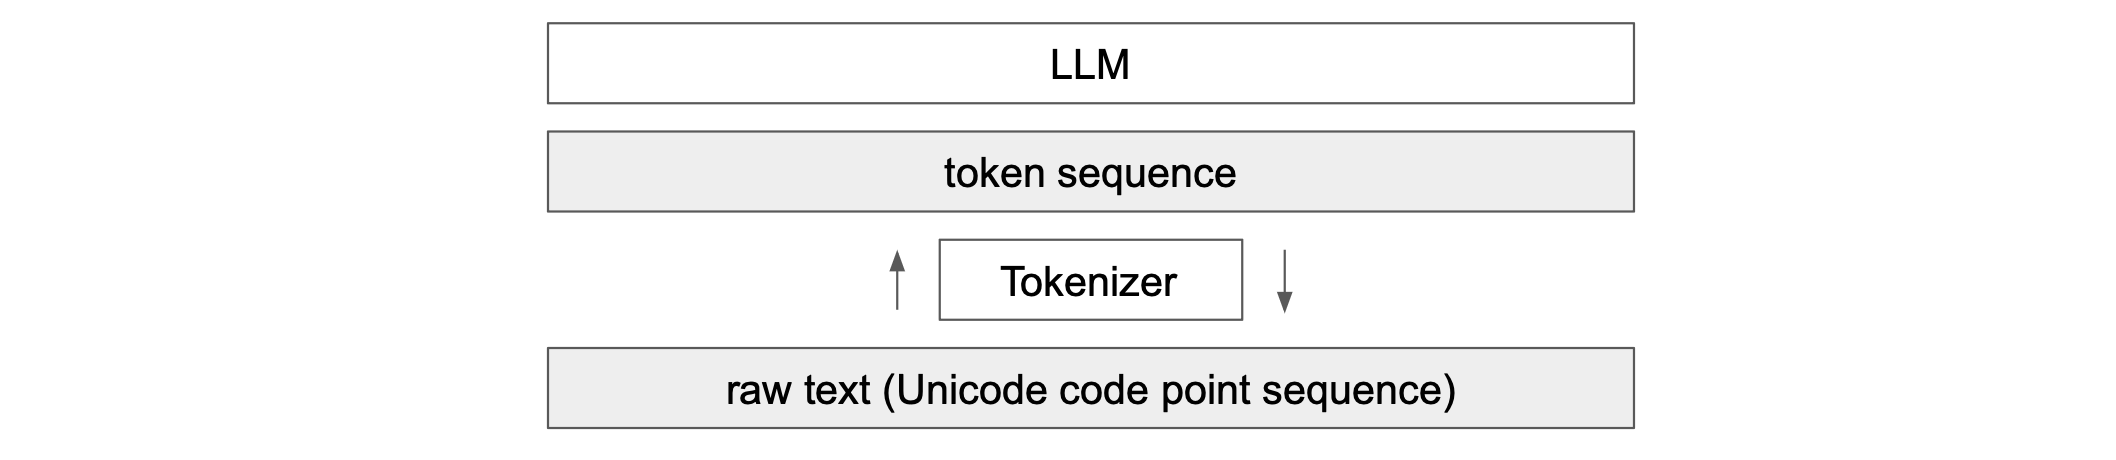

### decoding

Given a sequence of integers in the range [0, vocab_size], what is the text?


In [ ]:
vocab = {idx: bytes([idx]) for idx in range(256)}
# 计算机底层处理的是字节（Bytes），取值范围是 0-255。
# 创建一个字典，把 0 到 255 的每个整数映射成它对应的原始字节。
# vocab 最初长这样：{0: b'\x00', 1: b'\x01', ..., 97: b'a', ...}。这保证了无论什么数据，起码都能以“单字节”的形式被表示。

# 这里的 merge 是一个合并树，如下：
#  d
# / \
# a b c
# merges 是 BPE 算法训练出来的结果，记录了哪些 pair 应该合并。比如：(104, 101) -> 256（假设 104 是 'h'，101 是 'e'）。
# 遍历所有合并规则，将两个旧 Token 的字节串拼接在一起，赋予一个新的编号 idx。
# vocab 被扩充了。现在编号 256 可能代表 b'he'，编号 257 可能代表 b'the'。这就是为什么一个 Token 可以代表一整个单词。
for (p0, p1), idx in merges.items():
    # .items() 是字典的标准方法，它会同时取出字典里的 键（Key） 和 值（Value）。
    vocab[idx] = vocab[p0] + vocab[p1]
    # 有一个很重要的点就是这里的迭代顺序必须要和 merge 字典的插入顺序保持一致。
    # 因为我们肯定要从最基础的 merge 开始做合并，不能直接 merge 两个不基础的 token（该 token 可能还没有创建出来）。

    # ⭐️⭐️⭐️ 这里的 vocab 是我们最终的词表！

def decode(ids):
  # given ids (list of integers), return Python string
  tokens = b"".join(vocab[idx] for idx in ids)
  # vocab[idx] for idx in ids：根据输入的数字列表，去 vocab 字典里查找对应的字节块。
  # b"".join(...)：将这些字节块按顺序“粘”在一起，形成一个完整的长字节串。
  text = tokens.decode("utf-8", errors="replace")
  # 如果 ids 是所有 encode text 产出的内容，那么一口气 decode 是不会有问题的，因为不会出现多字节截断的情况。
  # 但如果 ids 是 encode text 产出的部分内容，那么按照 get_stats 和 merge 的逻辑，则会出现多字节截断情况，导致没办法正常的去做 utf 解码，因为 utf 解码是由一套规则的，开始的字节必须要是遵守某个范式才行。多字节截断后，中间字节可能就无法被 utf 正常解码了。
  # 当然也有可能是 LLM 的词表输出有问题，直接输出了被截断的字节。

  # 那么工业界如何解决这个问题？
  # 字节缓存区（Byte Buffer），后端不会直接把接收到的 Token 丢给前端。它会维护一个缓冲区，如果当前的字节序列无法凑成一个完整的字符，就先存着，等下一个 Token 传过来。直到能凑成完整字符，再发给前端展示。这相当于把问题交给解码端处理。

  # .decode("utf-8")：将二进制字节串按照 UTF-8 编码格式转换成 Python 的字符串（Unicode）。
  # errors="replace"：这是一个容错机制。如果某个字节序列不符合 UTF-8 规范（比如 BPE 合并时把某个多字节字符拆断了），它不会报错崩溃，而是用一个特殊的符号（如 `�`）代替，保证程序能跑完。
  return text

print(decode([128]))

�


### encoding

The other way around: Given a string, what are the tokens?


In [ ]:
merges

{(101, 32): 256,
 (105, 110): 257,
 (115, 32): 258,
 (116, 104): 259,
 (101, 114): 260,
 (99, 111): 261,
 (116, 32): 262,
 (226, 128): 263,
 (44, 32): 264,
 (97, 110): 265,
 (111, 114): 266,
 (100, 32): 267,
 (97, 114): 268,
 (101, 110): 269,
 (257, 103): 270,
 (261, 100): 271,
 (121, 32): 272,
 (46, 32): 273,
 (97, 108): 274,
 (259, 256): 275}

In [ ]:
# 在 tokenizer 的训练过程中，我们核心的数据是不是就是 vocab 和 merges？
# 在 BPE（Byte Pair Encoding）算法中，vocab 和 merges 确实就是该分词器的“灵魂”和全部产出。
# 如果把 Tokenizer 比作一个翻译官，那么这两者分别承担了不同的角色：

# merges：操作手册（如何合并）
# merges 存储的是合并的规则顺序。它记录了算法在训练阶段“进化”的过程。
# 内容：它是一个有序的列表（或字典），记录了哪些相邻的 ID 应该被融合成一个新的 ID。
# 作用：主要用于 Encode（编码）。当你给分词器一段新文本时，它会查阅 merges，按照训练时的顺序，依次把文本中的字节序列折叠、折叠、再折叠，直到没有规则可以匹配为止。

# vocab：映射字典（是什么意思）
# vocab 存储的是最终的映射关系。它记录了每一个 ID 对应的底层字节流（Bytes）。
# 内容：ID -> 字节序列。
# 作用：主要用于 Decode（解码）。当 LLM 吐出一个数字 ID 时，分词器直接去 vocab 里查这个 ID 对应哪一串字节，然后拼起来转成字符串。


# 训练阶段，我们通过原始文本，不断地寻找 top_pair，每找到一个就往 merges 里添加一条规则，同时往 vocab 里添加一个新词条。
# 推理阶段（使用时），Encode 依赖 merges（因为要把碎的拼成大的，需要知道合并的先后顺序）；Decode 依赖 vocab（因为要把大的还原成碎的，直接查表最快）。

# 虽然核心是这两个，但在实际工程（比如 HuggingFace 的 tokenizer.json）中，通常还会多存一个 Special Tokens（特殊标记），比如 [CLS], [SEP], <|endoftext|> 等。这些通常不是通过 BPE 统计出来的，而是我们人为强制加入到 vocab 里的，用来标记对话的结束、填充等功能。这些东西（包括 vocab、merges 和 spcial token）一般会被存储到 tokenizer.json 文件中。
def encode(text):
  # given a string, return list of integers (the tokens)
  tokens = list(text.encode("utf-8"))
  # 先将字符串转为 UTF-8 字节流，再转成整数列表。
  # 此时 tokens 里的每个元素都在 0-255 之间。正如你之前发现的，汉字在这里已经被拆成了 3 个字节。
  while len(tokens) >= 2:
    stats = get_stats(tokens) # 主要是拿 pair 对。
    pair = min(stats, key=lambda p: merges.get(p, float("inf")))
    # 对于 stats 中的每对 pair，如果这一对 p 在规则表里，返回它的顺序索引，如果不在，返回“无穷大”。
    # 这一行是在说：“在当前文本所有相邻的组合中，哪一对是我们在训练时最早决定合并的？”（最早合并的优先级最高）。
    if pair not in merges:
      break 
      # 如果在当前的 tokens 列表里，没有任何一对相邻元素存在于我们的规则表 merges 中，说明已经压缩到极限了，停止循环。
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
    # 查出这一对 pair 合并后的新 ID（idx）。
    # merge 函数：在 tokens 列表中找到所有的 pair，把它们全部替换成 idx。
    # 结果：列表长度变短了，数字变大了（出现了大于 255 的数）。
  return tokens

print(encode("我叫王兴浩"))

[230, 136, 145, 229, 143, 171, 231, 142, 139, 229, 133, 180, 230, 181, 169]


In [13]:
print(decode(encode("我叫王兴浩")))

我叫王兴浩


In [ ]:
text2 = decode(encode(text))
print(text2 == text)

True


In [ ]:
valtext = "Many common characters, including numerals, punctuation, and other symbols, are unified within the standard and are not treated as specific to any given writing system. Unicode encodes thousands of emoji, with the continued development thereof conducted by the Consortium as a part of the standard.[4] Moreover, the widespread adoption of Unicode was in large part responsible for the initial popularization of emoji outside of Japan. Unicode is ultimately capable of encoding more than 1.1 million characters."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


### Forced splits using regex patterns (GPT series)


In [ ]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")
# 's|'t|'re|'ve|'m|'ll|'d: 优先匹配英文中的缩写（如 've, 's）。这能保证 Hello've 不会被当成一个整体，而是切成 Hello 和 've。
#  ?\p{L}+: 匹配字母（Language characters）。前面的  ? 表示可选的空格。这会把单词抓取出来（例如  Hello）。
#  ?\p{N}+: 匹配数字（Numbers）。同样带可选空格（例如  123）。
#  ?[^\s\p{L}\p{N}]+: 匹配标点符号/特殊符号。这保证了 !!!? 会被单独切出来，而不会和前面的单词连在一起。
#  \s+(?!\S): 匹配除了结尾的空格。
#  \s+: 匹配多余的空格。

print(re.findall(gpt2pat, "Hello've world123 how's are you!!!?"))
# 这段代码展示了 GPT-2 在进行 BPE 训练和编码之前，如何通过**正则表达式（Regex）**对原始文本进行“预分词（Pre-tokenization）”。
# 他的核心目的是为了防止 BPE 跨越字符类别进行合并。

# 这行正则表达式就是为了解决我们之前担心的“词表冗余”问题。
# 强制类别隔离。如果没有这个正则，BPE 可能会把 you!!!? 训练成一个 Token。有了正则后，you 是字母类别，!!!? 是标点类别。正则会先把它们切成 [' you', '!!!?']。因为 BPE 只能在列表内部的元素里进行合并，它永远没机会把 you 和 ! 凑成一对。
# 优化词表分配。词表里只需要存一个 !!!? 或 !，以及一个 you。它不需要为 you!、you?、you... 等无数种组合分别准备 ID。因为标点符号 Token 可以和任何单词灵活组合，而不需要每个单词都带一套标点变体。

['Hello', "'ve", ' world', '123', ' how', "'s", ' are', ' you', '!!!?']


In [ ]:
example = """
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
"""
print(re.findall(gpt2pat, example))

# 经过 regex 预分割（Pre-tokenization）后，Tokenizer 的训练流程就从处理“一整块长文本”变成了处理“一个字符串列表”。
# 1. 列表内部的独立化。BPE 算法现在只在由 regex 切分出的每一个独立子字符串（碎片）内部寻找相邻对进行合并，禁止越界，如果列表是 [' Hello', '!!!?']，BPE 可以合并 H+e，但绝对无法合并 o 和 !，因为它们分属于不同的列表元素。
# 2. 初始化基础词表 (Initialization)，将预分割后的所有文本拆解为原始字节（0-255），确保词表（Vocabulary）初始包含这 256 个字节，保证任何文本都能被表示。
# 3. 迭代寻找最高频对 (Iteration)。这是一个循环往复的过程，全局计数——在所有预分割的碎片内部，统计所有相邻对（Pair）出现的总次数。选取冠军——找到出现频率最高的那一对 (p0, p1)。记录规则——将这一对存入 merges，并赋予一个新的 Token ID（如 256, 257...）。
# 4. 全局更新 (Merge & Repeat)。替换操作——在整个数据集中，将所有出现的 (p0, p1) 替换为新 ID。重复循环——继续寻找下一个最高频对，直到达到预设的词表大小（例如 50,257）。
# 5. 产出核心文件。训练结束后的最终产出就是你之前提到的两个核心，merges——一份按顺序排列的合并“操作指南”。vocab——一份数字 ID 到字节序列的最终“对照映射表”。

['\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'FizzBuzz', '")', '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Fizz', '")', '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Buzz', '")', '\n   ', ' else', ':', '\n       ', ' print', '(', 'i', ')', '\n']


```bash
pip install tiktoken # added for colab
```

In [ ]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
# GPT-2 对空格的合并非常保守。它可能无法一次性将 4 个空格识别为一个 Token，而是将其拆分成多个单空格 Token 或较小的组合。
print(enc.encode("    hello world!!!"))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding("cl100k_base")
# GPT-4 的正则表达式和词表训练允许更大规模的合并。它能够识别出     （4 个空格）并将其映射为一个单一的 ID。这在处理代码缩进（Tab/Space）时效率极高。
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]


Reference the GPT-2 [encoder.py](https://github.com/openai/gpt-2/blob/master/src/encoder.py)
Download the vocab.bpe and encoder.json files.

In [14]:
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json

--2026-02-24 19:39:06--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
正在解析主机 openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.209.18.33
正在连接 openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.209.18.33|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：456318 (446K) [application/octet-stream]
正在保存至: “vocab.bpe”

vocab.bpe           100%[===================>] 445.62K   552KB/s  用时 0.8s      

2026-02-24 19:39:08 (552 KB/s) - 已保存 “vocab.bpe” [456318/456318])

--2026-02-24 19:39:08--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json
正在解析主机 openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.209.18.33
正在连接 openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.209.18.33|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：1042301 (1018K) [application/json]
正在保存至: “encoder.json”

encoder.json        100%[===================>]   1018K   816KB/s  用时 1.2s   

In [ ]:
import os, json

with open('encoder.json', 'r') as f:
    encoder = json.load(f) # <--- ~equivalent to our "vocab"
    # 这就是我们之前讲的 vocab 变量。
    # {'!': 0,
    # '"': 1,
    # '#': 2,
    # '$': 3,

with open('vocab.bpe', 'r', encoding="utf-8") as f:
    bpe_data = f.read()
    # 这就是我们之前的 merges 变量。
    # #version: 0.2
    # Ġ t
    # Ġ a
    # h e
bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
# ^---- ~equivalent to our "merges"


### special tokens


In [ ]:
len(encoder) # 256 raw byte tokens. 50,000 merges. +1 special token

# encoder
encoder


'#version: 0.2\nĠ t\nĠ a\nh e\ni n\nr e\no n\nĠt he\ne r\nĠ s\na t\nĠ w\nĠ o\ne n\nĠ c\ni t\ni s\na n\no r\ne s\nĠ b\ne d\nĠ f\nin g\nĠ p\no u\nĠa n\na l\na r\nĠt o\nĠ m\nĠo f\nĠ in\nĠ d\nĠ h\nĠan d\ni c\na s\nl e\nĠt h\ni on\no m\nl l\nen t\nĠ n\nĠ l\ns t\nĠ re\nv e\nĠ e\nr o\nl y\nĠb e\nĠ g\nĠ T\nc t\nĠ S\ni d\no t\nĠ I\nu t\ne t\nĠ A\nĠ is\nĠ on\ni m\na m\no w\na y\na d\ns e\nĠth at\nĠ C\ni g\nĠf or\na c\nĠ y\nv er\nu r\nĠ u\nl d\nĠs t\nĠ M\n\' s\nĠ he\nĠ it\nat ion\nit h\ni r\nc e\nĠy ou\ni l\nĠ B\nĠw h\no l\nĠ P\nĠw ith\nĠ 1\nt er\nc h\nĠa s\nĠw e\nĠ (\nn d\ni ll\nĠ D\ni f\nĠ 2\na g\ner s\nk e\nĠ "\nĠ H\ne m\nĠc on\nĠ W\nĠ R\nhe r\nĠw as\nĠ r\no d\nĠ F\nu l\nat e\nĠa t\nr i\np p\no re\nĠT he\nĠs e\nu s\nĠp ro\nĠh a\nu m\nĠa re\nĠd e\na in\nan d\nĠo r\nig h\nes t\nis t\na b\nr om\nĠ N\nt h\nĠc om\nĠ G\nu n\no p\n0 0\nĠ L\nĠn ot\nes s\nĠe x\nĠ v\nre s\nĠ E\ne w\nit y\nan t\nĠb y\ne l\no s\nor t\no c\nq u\nĠf rom\nĠha ve\nĠs u\ni ve\nou ld\nĠs h\nĠth is\nn t\nr a\np e\nigh t\nar t\nm

In [ ]:
encoder['<|endoftext|>'] # the only special token in use for the GPT-2 base model
# 256 raw + 50000 merges + 1 special token。
# 这里的 special token 就是用来区分不同的文档的。
# 模型需要自己来学习 <|endoftext|> 前后的内容是完全无关的。

# 我们可以基于 tiktoken 来扩展自己的 tokenizer，详情可以看 tiktoken 的官方 github 库。


50256

### minbpe exercise

At this point you have everything you need to build your own GPT-4 tokenizer. This is the [exercise progression](https://github.com/karpathy/minbpe/blob/master/exercise.md) you may wish to follow. You'll note that it is part of the [minbpe](https://github.com/karpathy/minbpe) repo, which is the solution to that exercise, and is a cleaned up version of the code above.

In [ ]:
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # GPT-4 tokenizer
print(enc.encode("안녕하세요 👋 (hello in Korean!)"))
print(enc.decode(enc.encode("안녕하세요 👋 (hello in Korean!)")) == "안녕하세요 👋 (hello in Korean!)")
# match the above for your own tokenizer, and also implement a train() function

[31495, 230, 75265, 243, 92245, 62904, 233, 320, 15339, 304, 16526, 16715]
True


### sentencepiece

Commonly used because (unlike tiktoken) it can efficiently both train and inference BPE tokenizers. It is used in both Llama and Mistral series.

之所以被广泛使用，是因为它（与 tiktoken 不同）能够高效地完成 BPE 分词器的训练与推理。Llama 和 Mistral 系列模型均采用了这一方案。

[sentencepiece on Github link](https://github.com/google/sentencepiece).

**The big difference**: sentencepiece runs BPE on the Unicode code points directly! It then has an option `character_coverage` for what to do with very very rare codepoints that appear very few times, and it either maps them onto an UNK token, or if `byte_fallback` is turned on, it encodes them with utf-8 and then encodes the raw bytes instead.

核心区别：SentencePiece 直接在 **Unicode 码点（Code points）**上运行 BPE！它提供了一个名为 character_coverage 的选项，用于处理出现频率极低的罕见码点：这些罕见码点要么被映射为 UNK（未知字符） 标记，要么（如果开启了 byte_fallback）则先将其转换为 UTF-8 编码，然后再对这些原始字节进行编码。

TLDR:

- tiktoken encodes to utf-8 and then BPEs bytes
- sentencepiece BPEs the code points and optionally falls back to utf-8 bytes for rare code points (rarity is determined by character_coverage hyperparameter), which then get translated to byte tokens.

(Personally I think the tiktoken way is a lot cleaner...)

太长不看版（TL;DR）：
tiktoken：先将文本编码为 UTF-8，然后对**字节（Bytes）**运行 BPE。

SentencePiece：直接对码点运行 BPE，并针对罕见码点（其稀有度由 character_coverage 超参数决定）提供可选的 UTF-8 字节回退机制，这些字节随后会被转化为字节标记（Byte tokens）。

（我个人认为 tiktoken 的处理方式要简洁得多……）

In [ ]:
import sentencepiece as spm
# 在目前，还是 tiktoken 更加常用且强大一些。
# tiktoken 直接对 UTF-8 字节进行操作，这意味着它理论上可以处理任何文本，永远不会出现“无法识别”的字符（[UNK]）。
# 此外 tiktok 性能极快，tiktoken 的核心是用 Rust 写的，它的分词速度通常比 SentencePiece 快好几倍，这在处理每秒数百万 token 的商业推理时非常重要。

# SentencePiece 是可能会出现UNK 的，是因为他直接对 unicode 做 bpe。
# Unicode 字符集非常庞大（目前有超过 14 万个字符）。如果 SentencePiece 要把每一个 Unicode 字符都放进词表，那么词表的基础部分就会变得极其臃肿。
# 在训练 SentencePiece 时，它会根据你设置的 character_coverage 参数（默认通常是 0.9995）来决定：
# 高频字符直接进入词表，而对于极低频字符，如果你提供的训练语料里某个生僻字（比如某个古籍里的汉字或特殊的 Emoji）只出现了一次，SentencePiece 为了保证效率，不会为它分配一个位置。
# 结果当推理（Inference）时遇到了这些“落选”的稀有字符，模型找不到对应的 ID，就只能把它们通通扔进 [UNK] 这个大垃圾桶里。

# 当然 SentencePiece 采取了一些补救措施——byte_fallback。byte_fallback 其实就是 SentencePiece 在向 tiktoken 的优点学习，关闭时：遇到不认识的码点直接报 [UNK]。开启时遇到不认识的码点，既然我不认识这个“字”，那我就把它打碎成 UTF-8 字节，用词表里的字节 Token 来代表它。所以，现在的 Llama 3 等模型虽然还在用类似 SentencePiece 的框架，但因为开启了类似 byte_fallback 的功能，实际上已经几乎看不到 [UNK] 了。

In [ ]:
# write a toy.txt file with some random text
with open("toy.txt", "w", encoding="utf-8") as f:
  f.write("SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.")

Docs for sentencepiece options:

- [markdown](https://github.com/google/sentencepiece/blob/master/doc/options.md)
- [protobuf](https://github.com/google/sentencepiece/blob/master/src/sentencepiece_model.proto#L193)

In [ ]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(
  # input spec
  input="toy.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,
  # normalization
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995,
  # 如果某个 unicode 在整个训练文档中的占比小于 0.99995，那么他就不会加入到最后的词表中，而是丢到 UNK 中。
  byte_fallback=True,
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)


In [ ]:
sp = spm.SentencePieceProcessor()
sp.load('tok400.model')
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39],
 ['<0x25>', 40],
 ['<0x26>', 41],
 ['<0x27>', 42],
 ['<0x28>', 43],
 ['<0x29>', 44],
 ['<0x2A>', 45],
 ['<0x2B>', 46],
 ['<0x2C>', 47],
 ['<0x2D>', 48],
 ['<0x2E>', 49],
 ['<0x2F>', 50],
 ['<0x30>', 51],
 ['<0x31>', 52],
 ['<0x32>', 53],
 ['<0x33>', 54],
 ['<0x34>', 55],
 ['<0x35>', 56],
 ['<0x36>', 57],
 ['<0x37>', 58],
 ['<0x38>', 5

In [ ]:
ids = sp.encode("hello 안녕하세요")
print(ids)

[362, 378, 361, 372, 358, 362, 239, 152, 139, 238, 136, 152, 240, 152, 155, 239, 135, 187, 239, 157, 151]


In [ ]:
print([sp.id_to_piece(idx) for idx in ids])
# 这里的 `_` 其实就是空格，那么为什么 sentencepiece 需要添加一个空格前缀的呢？
# 这其实是因为 add_dummy_prefix=True 这个配置。
# 在 tiktoken 的分词器中 `hello` 和 `[space]hello` 是不一样的两个 token，因此直接往 hello 前面加一个 space 可以合并这两个语义相同的 token。
# tiktoken 不把 [space]hello 分开的原因是防止 [space] 占据太多的上下文长度。

['▁', 'h', 'e', 'l', 'lo', '▁', '<0xEC>', '<0x95>', '<0x88>', '<0xEB>', '<0x85>', '<0x95>', '<0xED>', '<0x95>', '<0x98>', '<0xEC>', '<0x84>', '<0xB8>', '<0xEC>', '<0x9A>', '<0x94>']


**Llama 2 tokenizer proto**
If you'd like to export the raw protocol buffer for the `tokenizer.model` released by meta, this is a [helpful issue](https://github.com/google/sentencepiece/issues/121). And this is the result:

```
normalizer_spec {
  name: "identity"
  precompiled_charsmap: ""
  add_dummy_prefix: true
  remove_extra_whitespaces: false
  normalization_rule_tsv: ""
}

trainer_spec {
  input: "/large_experiments/theorem/datasets/MERGED/all.test1.merged"
  model_prefix: "spm_model_32k_200M_charcov099995_allowWSO__v2"
  model_type: BPE
  vocab_size: 32000
  self_test_sample_size: 0
  input_format: "text"
  character_coverage: 0.99995
  input_sentence_size: 200000000
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  num_threads: 80
  num_sub_iterations: 2
  max_sentence_length: 4192
  shuffle_input_sentence: true
  max_sentencepiece_length: 16
  split_by_unicode_script: true
  split_by_whitespace: true
  split_by_number: true
  treat_whitespace_as_suffix: false
  split_digits: true
  allow_whitespace_only_pieces: true
  vocabulary_output_piece_score: true
  hard_vocab_limit: true
  use_all_vocab: false
  byte_fallback: true
  required_chars: ""
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_surface: " \342\201\207 "
  unk_piece: "<unk>"
  bos_piece: "<s>"
  eos_piece: "</s>"
  pad_piece: "<pad>"
  train_extremely_large_corpus: false
  enable_differential_privacy: false
  differential_privacy_noise_level: 0.0
  differential_privacy_clipping_threshold: 0
}
```

#### vocab_size

- Q: what should be vocab size?
- Q: how can I increase vocab size?
- A: let's see. Reminder: [gpt.py](https://github.com/karpathy/ng-video-lecture/blob/master/gpt.py) from before.

表大小 (vocab_size)

- 问： 词表大小（vocab_size）应该是多少？

# 在现代大模型（LLM）中，词表大小（vocab_size）通常在 32,000 到 128,000 之间。

# 如果词表太小：
- 序列长度爆炸：因为每个 Token 代表的信息量太少，表达同一个句子需要的 Token 数量会非常多。这会导致模型的上下文窗口（Context Window）变相缩水（同样的 4k 窗口，能装下的文本更少了）。
- 计算成本增加：虽然单个 Token 的预测变快了，但因为总步数（Sequence Length）增加了，整体推理时间反而可能变长。
- 语义理解困难：模型需要花费大量的注意力（Attention）去拼凑碎片化的 Token（比如 h + e + l + l + o），很难捕捉到高阶的词义。

# 如果词表太大：
- 嵌入层（Embedding）臃肿：模型的参数量很大一部分消耗在 Embedding 层和最后的 Linear 层。如果词表翻倍，这些层的参数也会翻倍，浪费显存。
- 数据稀疏性问题（Sparse Data）：很多罕见的 Token 在训练语料中可能只出现几次。模型根本无法学好这些词的向量表示（Embedding），导致生成这些词时效果很差。
- 语义太过于稀疏，一个大的 token 代表了太多的内容，导致语义太过于稀疏。如果词表里直接有一个 Token 叫 unbelievably_unhappy，模型就会把它当成一个独立的原子。结果就是模型失去了通过拆解子词（Sub-tokens）来推断未知词义的能力。它变得像是在“背字典”，而不是在“学语言”。
- 计算瓶颈：在生成每个 Token 时，模型最后需要计算一个覆盖全词表的概率分布（Softmax）。词表越大，这一步的计算开销和显存占用就越高。

- 问： 我该如何增加词表的大小？

# 分词器层面的操作，需要训练辅助词表并进行词表合并，包括准备好目标语料（如中文医学文献），用 SentencePiece 训练一个小的词表（比如 10,000 个新 token）。然后将原模型的词表（Source Vocab）与新词表（New Vocab）取并集，生成最终的 Target Vocab。
# 模型架构层面的操作，修改 Embedding 层同时修改 LM Head 层，然后冻结 Transformer 的核心层，只训练 Embedding 和 LM Head。这能让模型快速学会新词的基础表示，而不破坏原有的逻辑能力。

- 答： 让我们来看看。友情提醒：参考我们之前看过的 gpt.py（来自 Andrej Karpathy 的项目）。

### Final recommendations

- Don't brush off tokenization. A lot of footguns and sharp edges here. Security issues. Safety issues.
- Eternal glory to anyone who can delete tokenization as a required step in LLMs.
- In your own application:
  - Maybe you can just re-use the GPT-4 tokens and tiktoken?
  - If you're training a vocab, ok to use BPE with sentencepiece. Careful with the million settings.
  - Switch to minbpe once it is as efficient as sentencepiece :)


最后的建议
- 千万不要轻视分词（Tokenization）。 这里潜伏着大量的坑（footguns）和隐患。它不仅关乎性能，还涉及安全问题和防御性/安全性（Safety）问题。
- 谁能把“分词”这一步从大模型中彻底删掉，谁就将获得永恒的荣耀。（注：指实现真正的纯字节或原始多模态输入，跳过分词步骤）
- 在开发你自己的应用时：
  - 或许你可以直接复用 GPT-4 的 Token 和 tiktoken？（省心省力）
  - 如果你必须训练自己的词表，使用 SentencePiece 的 BPE 方案也是可以的。但要格外小心它那成百上千个复杂的参数设置。
  - 等到 minbpe 变得像 SentencePiece 一样高效时，就换掉它吧！:)

https://arxiv.org/abs/2304.08467



### Also worth looking at

- [Huggingface Tokenizer](https://huggingface.co/docs/transformers/main_classes/tokenizer). I didn't cover it in detail in the lecture because the algorithm (to my knowledge) is very similar to sentencepiece, but worth potentially evaluating for use in practice.

其他值得关注的资源

- Hugging Face 分词器 (Tokenizer)：我在课程中没有详细讲解它，因为（据我所知）它的算法与 SentencePiece 非常相似。但在实际应用中，它非常值得评估和尝试。